###**URBAN MOBILITY MEETS AI: A MACHINE LEARNING APPROACH TO CAPITAL BIKESHARE**


###Introduction:
Bike-sharing systems are a modern evolution of traditional bike rental services,, wherein the whole procedure, encompassing membership, bike rental, and return, has been mechanized. These systems enable users to conveniently lease a bicycle at one station and return it to a different station via shuttle services. Today, there exist more than 500 bike-sharing initiatives worldwide, encompassing a fleet of over 500,000 bicycles. The increasing prevalence of these systems can be attributed basically to their substantial contributions in addressing traffic, environmental, and public health issues.

Furthermore, apart from their pragmatic uses, the data produced by bike-sharing systems offers significant prospects for scholarship. In contrast to other modes of public transportation like buses or subways, these systems offer accurate documentation of journey length, origin and destination points. This technology converts bike-sharing networks into a virtual sensor system, allowing for the observation of urban mobility patterns. Hence, it is feasible to identify significant urban occurrences by examining these observational trends.



###Overview of the dataset:
The dataset used for this analysis was acquired from the system data of Capital Bikeshare (link: https://capitalbikeshare.com/system-data). The dataset comprises records of bicycle journeys undertaken via the Capital Bikeshare system, including a range of bike models and ride properties such as origin and destination points, ride lengths, and user categories.


### Association Rule Mining

In [ ]:
#import necessary Libraries
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


In [ ]:
# For ARM, we'll use start_station_name, end_station_name, and rideable_type as the 'items'
# Select the relevant columns
transaction_data = df[['start_station_name', 'end_station_name', 'rideable_type']]

# Preview the first 5 rows of the dataset in transactional form (before conversion)
print("Sample of the transaction data:")
transaction_data.head()






Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'duration', 'start_day', 'start_month', 'start_hour',
       'distance', 'start_end_station_combination'],
      dtype='object')
Sample of the transaction data:


,start_station_name,end_station_name,rideable_type
0,Hains Point/Buckeye & Ohio Dr SW,23rd & E St NW,classic_bike
1,Hains Point/Buckeye & Ohio Dr SW,Hains Point/Buckeye & Ohio Dr SW,classic_bike
2,15th St & N Scott St,Roosevelt Island,classic_bike
3,8th & Eye St SE / Barracks Row,3rd & Tingey St SE,classic_bike
9,4th & College St NW,Georgia Ave & Morton St NW,electric_bike


In [ ]:
# Create transactions by merging the relevant columns into lists of 'items'
# Using .loc[] to safely assign the new column
transaction_data.loc[:, 'transaction_items'] = transaction_data.apply(
    lambda row: [row['start_station_name'], row['end_station_name'], row['rideable_type']], axis=1
)

# Now, we will only keep the transaction items
transactions = transaction_data['transaction_items'].tolist()

# Preview the transformed transactions
print("\nSample of transformed transaction data:")
transactions[:5]  # Show the first 5 transactions


Sample of transformed transaction data:


<ipython-input-52-0015dfdb0b35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_data.loc[:, 'transaction_items'] = transaction_data.apply(


[['Hains Point/Buckeye & Ohio Dr SW', '23rd & E St NW ', 'classic_bike'],
 ['Hains Point/Buckeye & Ohio Dr SW',
  'Hains Point/Buckeye & Ohio Dr SW',
  'classic_bike'],
 ['15th St & N Scott St', 'Roosevelt Island', 'classic_bike'],
 ['8th & Eye St SE / Barracks Row', '3rd & Tingey St SE', 'classic_bike'],
 ['4th & College St NW', 'Georgia Ave & Morton St NW', 'electric_bike']]

In [ ]:
#Convert the transaction data to a format suitable for ARM (One-Hot Encoding)
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)



In [ ]:
#Apply the Apriori Algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)  # Use a minimum support threshold
print("\nFrequent Itemsets:")
frequent_itemsets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Frequent Itemsets:


,support,itemsets
0,0.010989,(11th & M St NW)
1,0.013832,(14th & R St NW)
2,0.016631,(14th & V St NW)
3,0.012095,(14th St & Rhode Island Ave NW)
4,0.017811,(15th & P St NW)


In [ ]:
#Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print("\nAssociation Rules:")
rules.head()



Association Rules:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(classic_bike),(15th & P St NW),0.670073,0.017811,0.012183,0.018181,1.020760,0.000248,1.000377,0.061643
1,(15th & P St NW),(classic_bike),0.017811,0.670073,0.012183,0.683984,1.020760,0.000248,1.044019,0.020707
2,(classic_bike),(1st & M St NE),0.670073,0.016771,0.011803,0.017615,1.050346,0.000566,1.000859,0.145282
3,(1st & M St NE),(classic_bike),0.016771,0.670073,0.011803,0.703808,1.050346,0.000566,1.113897,0.048750
4,(4th St & Madison Dr NW),(classic_bike),0.012659,0.670073,0.010377,0.819754,1.223380,0.001895,1.830426,0.184934


In [ ]:
# Top 15 rules based on support
top_15_support_df = rules.nlargest(15, 'support')

# Top 15 rules based on confidence
top_15_confidence_df = rules.nlargest(15, 'confidence')

# Top 15 rules based on lift
top_15_lift_df = rules.nlargest(15, 'lift')



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print the top 15 rules for each metric

top_15_support_df



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(classic_bike),(Columbus Circle / Union Station),0.670073,0.021133,0.015367,0.022933,1.085175,0.001206,1.001842,0.237900
9,(Columbus Circle / Union Station),(classic_bike),0.021133,0.670073,0.015367,0.727147,1.085175,0.001206,1.209173,0.080184
14,(Lincoln Memorial),(classic_bike),0.014577,0.670073,0.012472,0.855550,1.276802,0.002704,2.284028,0.220000
15,(classic_bike),(Lincoln Memorial),0.670073,0.014577,0.012472,0.018612,1.276802,0.002704,1.004112,0.657094
0,(classic_bike),(15th & P St NW),0.670073,0.017811,0.012183,0.018181,1.020760,0.000248,1.000377,0.061643
1,(15th & P St NW),(classic_bike),0.017811,0.670073,0.012183,0.683984,1.020760,0.000248,1.044019,0.020707
2,(classic_bike),(1st & M St NE),0.670073,0.016771,0.011803,0.017615,1.050346,0.000566,1.000859,0.145282
3,(1st & M St NE),(classic_bike),0.016771,0.670073,0.011803,0.703808,1.050346,0.000566,1.113897,0.048750
16,(classic_bike),(Massachusetts Ave & Dupont Circle NW),0.670073,0.016742,0.011465,0.017110,1.022009,0.000247,1.000375,0.065272
17,(Massachusetts Ave & Dupont Circle NW),(classic_bike),0.016742,0.670073,0.011465,0.684821,1.022009,0.000247,1.046791,0.021902


In [ ]:
top_15_confidence_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
14,(Lincoln Memorial),(classic_bike),0.014577,0.670073,0.012472,0.855550,1.276802,0.002704,2.284028,0.220000
13,(Jefferson Dr & 14th St SW),(classic_bike),0.013444,0.670073,0.011456,0.852107,1.271662,0.002447,2.230845,0.216539
4,(4th St & Madison Dr NW),(classic_bike),0.012659,0.670073,0.010377,0.819754,1.223380,0.001895,1.830426,0.184934
9,(Columbus Circle / Union Station),(classic_bike),0.021133,0.670073,0.015367,0.727147,1.085175,0.001206,1.209173,0.080184
3,(1st & M St NE),(classic_bike),0.016771,0.670073,0.011803,0.703808,1.050346,0.000566,1.113897,0.048750
7,(5th & K St NW),(classic_bike),0.015988,0.670073,0.011230,0.702428,1.048286,0.000517,1.108730,0.046810
11,(Eastern Market Metro / Pennsylvania Ave & 8th...,(classic_bike),0.016028,0.670073,0.011014,0.687130,1.025456,0.000273,1.054519,0.025228
17,(Massachusetts Ave & Dupont Circle NW),(classic_bike),0.016742,0.670073,0.011465,0.684821,1.022009,0.000247,1.046791,0.021902
1,(15th & P St NW),(classic_bike),0.017811,0.670073,0.012183,0.683984,1.020760,0.000248,1.044019,0.020707
8,(classic_bike),(Columbus Circle / Union Station),0.670073,0.021133,0.015367,0.022933,1.085175,0.001206,1.001842,0.237900


In [ ]:
top_15_lift_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
15,(classic_bike),(Lincoln Memorial),0.670073,0.014577,0.012472,0.018612,1.276802,0.002704,1.004112,0.657094
14,(Lincoln Memorial),(classic_bike),0.014577,0.670073,0.012472,0.855550,1.276802,0.002704,2.284028,0.220000
12,(classic_bike),(Jefferson Dr & 14th St SW),0.670073,0.013444,0.011456,0.017097,1.271662,0.002447,1.003716,0.647500
13,(Jefferson Dr & 14th St SW),(classic_bike),0.013444,0.670073,0.011456,0.852107,1.271662,0.002447,2.230845,0.216539
4,(4th St & Madison Dr NW),(classic_bike),0.012659,0.670073,0.010377,0.819754,1.223380,0.001895,1.830426,0.184934
5,(classic_bike),(4th St & Madison Dr NW),0.670073,0.012659,0.010377,0.015487,1.223380,0.001895,1.002872,0.553433
8,(classic_bike),(Columbus Circle / Union Station),0.670073,0.021133,0.015367,0.022933,1.085175,0.001206,1.001842,0.237900
9,(Columbus Circle / Union Station),(classic_bike),0.021133,0.670073,0.015367,0.727147,1.085175,0.001206,1.209173,0.080184
2,(classic_bike),(1st & M St NE),0.670073,0.016771,0.011803,0.017615,1.050346,0.000566,1.000859,0.145282
3,(1st & M St NE),(classic_bike),0.016771,0.670073,0.011803,0.703808,1.050346,0.000566,1.113897,0.048750


In [ ]:

# Function to create a network graph for a specific metric (lift, confidence, or support)
def plot_association_rules(rules, metric, title):
    G = nx.DiGraph()

    # Add nodes and edges based on the selected metric
    for idx, rule in rules.iterrows():
        antecedents = list(rule['antecedents'])
        consequents = list(rule['consequents'])

        # Add each antecedent and consequent as a separate node
        for node in antecedents:
            G.add_node(node, size=rule['support'] * 1000)
        for node in consequents:
            G.add_node(node, size=rule['support'] * 1000)
        # Add edges from each antecedent to each consequent with weight based on the selected metric
        for antecedent in antecedents:
            for consequent in consequents:
                G.add_edge(antecedent, consequent, weight=rule[metric])  # Edge weight based on the metric

    # Extract node sizes and edge weights for plotting
    node_sizes = [G.nodes[node]['size'] for node in G.nodes]
    edge_weights = [G[u][v]['weight'] for u, v in G.edges]

    # Plot the network graph
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, k=0.5, seed=42)
    nx.draw(G, pos, with_labels=True, node_size=node_sizes, font_size=10,
            node_color='lightblue', edge_color=edge_weights, edge_cmap=plt.cm.Blues, width=2)
    plt.title(f'Network Graph of Top 15 Association Rules by {title}')
    plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


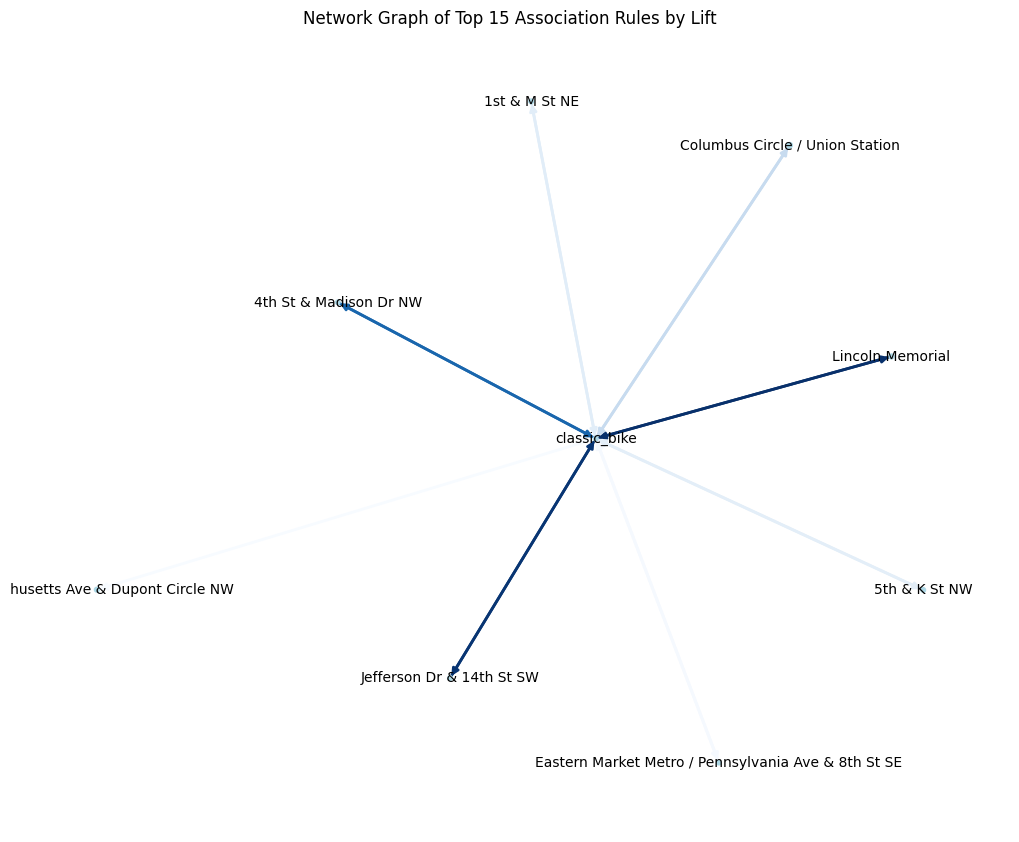

In [ ]:
# Plot the network graphs for each metric

# Top 15 rules by lift
plot_association_rules(top_15_lift_df, 'lift', 'Lift')

**Observation:**The graph indicates that the association between "classic_bike" and "Jefferson Dr & 14th St SW" exhibits a high lift, suggesting that this pair is significantly more likely to co-occur than by random chance. Lift emphasizes not only common patterns but also those that possess substantial significance beyond mere random co-occurrences.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


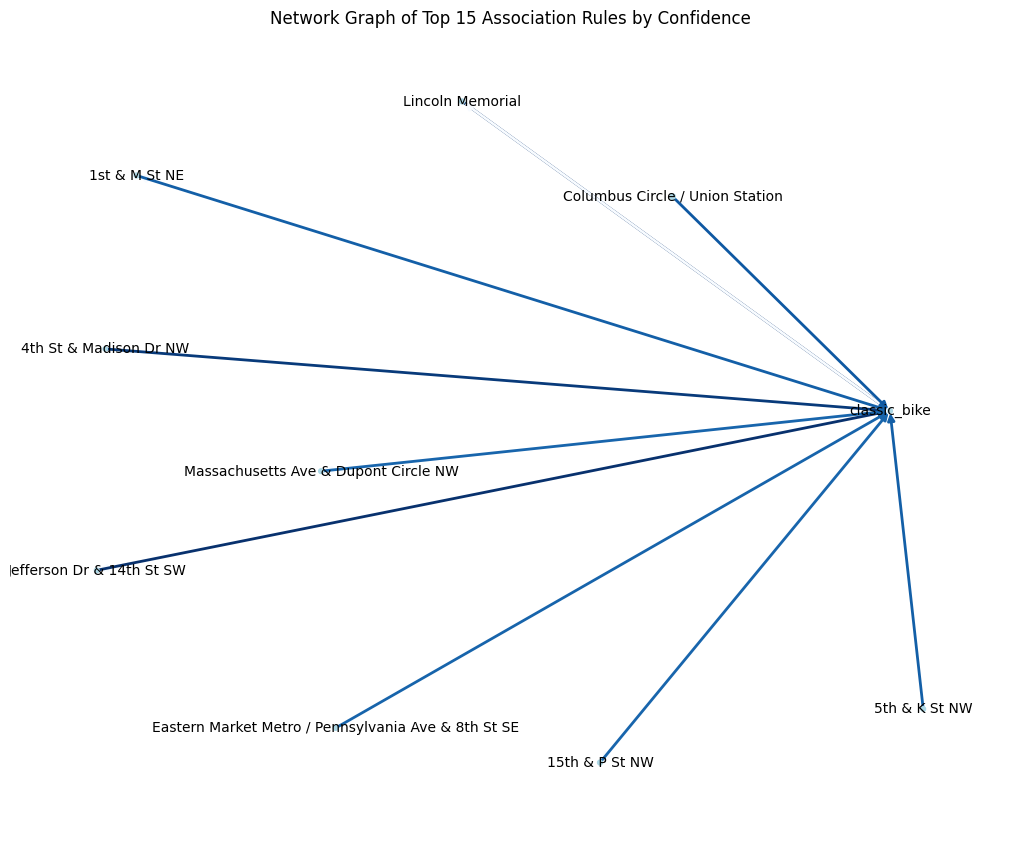

In [ ]:
# Top 15 rules by confidence
plot_association_rules(top_15_confidence_df, 'confidence', 'Confidence')

**Observations:**This graph indicates that rides commencing or concluding at significant stations, such as "Columbus Circle / Union Station" and "classic_bike," exhibit a strong correlation with other stations, including "15th & P St NW." The thicker edges signify rules with elevated confidence, indicating dependable patterns in rider behavior. Riders commencing at "Eastern Market Metro / Pennsylvania Ave" are predisposed to conclude their journeys at particular stations, demonstrating a marked inclination towards classic bicycles

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


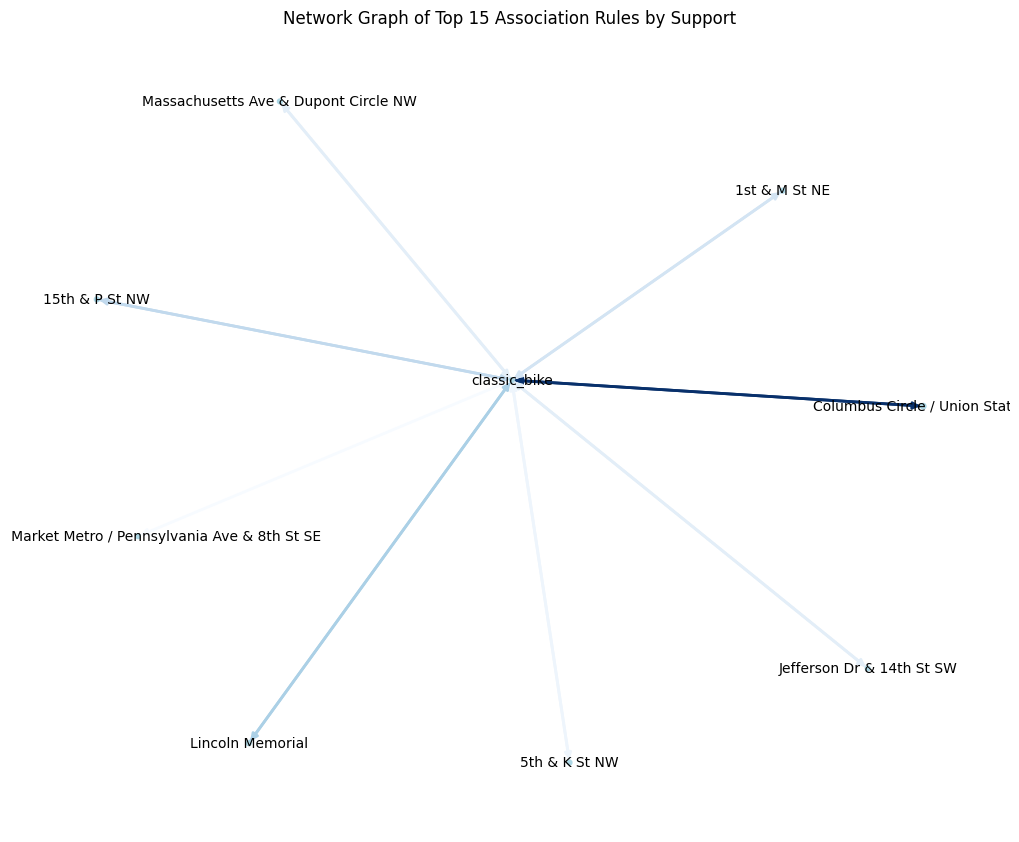

In [ ]:
# Top 15 rules by support
plot_association_rules(top_15_support_df, 'support', 'Support')

**Observations:** This graph illustrates that the connections associated with "classic_bike" are the most prevalent, signifying that "classic_bike" is frequently selected across various stations. The combination "Columbus Circle/Union Station" and "classic_bike" constitutes a frequently occurring pair, indicating its popularity among users.
